<a href="https://colab.research.google.com/github/cartman12/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Mohamad%20Ali%20Nasser%20-%20DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO

haberman_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'


In [0]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [11]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [0]:
column_headers = ['age' , 'year_o', 'n_p_a', 'survival_rate']

In [0]:
import pandas as pd
df = pd.read_csv(haberman_url, header = None)

In [10]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [12]:
# Correct number of isntances

df.count()

0    306
1    306
2    306
3    306
dtype: int64

In [13]:
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
# No null values

In [26]:
# adding the column names

column_headers = ['age' , 'year_o', 'n_p_a', 'survival_rate']

df = pd.read_csv(haberman_url, header = None, names = column_headers)

df.head()

,age,year_o,n_p_a,survival_rate
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# Boolean, replacing by True or False

df['survival_rate'] = df['survival_rate'] == 1

In [17]:
# As we are only exploring the data and not processing it, I will consider False True as 0 1, that is it will look nicer so i will add a 4th column for the encoding


df.head()

,age,year_o,n_p_o,survival_rate
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True


In [0]:
# i will create function and apply the encoding, this way i can have both options

def true_false(data):
    if data['survival_rate'] == True:
      return 1
    else:
      return 0
    
df['survival_encoding'] = df.apply(true_false, axis=1)

In [32]:
df.head()

,age,year_o,n_p_a,survival_rate,survival_encoding
0,30,64,1,True,1
1,30,62,3,True,1
2,30,65,0,True,1
3,31,59,2,True,1
4,31,65,4,True,1


In [22]:
df.dtypes

age                  int64
year_o               int64
n_p_o                int64
survival_rate         bool
survival_encoding    int64
dtype: object

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO

# I will create a crosstab that examines the relationship between survival and the number of positive axillary nodes. I will bin the positive axillary nodes 

axillary_bins = pd.cut(df['n_p_a'], 10).astype('<U32')
ct = pd.crosstab(df['survival_rate'], axillary_bins, rownames=['Survival'])

In [219]:
print(max(df['n_p_a']))

52


In [220]:
ct # we can see that their is a strong relation ship between number of positive axillary nodes and survival rate but that is especially at lower numbers and then it will have less impact

n_p_a,"(-0.052, 5.2]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]","(5.2, 10.4]"
Survival,,,,,,,,,
False,46,11,4,6,0,1,0,1,12
True,190,7,4,3,2,0,1,0,18


In [0]:
# bin the age and crosstab with P O A

age_bins = pd.cut(df['age'], 2).astype('<U32')
ct2 = pd.crosstab(axillary_bins, age_bins, normalize = True, rownames = ['N P O'])

In [229]:
ct2

age,"(29.947, 56.5]","(56.5, 83.0]"
N P O,,
"(-0.052, 5.2]",0.480392,0.290850
"(10.4, 15.6]",0.042484,0.016340
"(15.6, 20.8]",0.019608,0.006536
"(20.8, 26.0]",0.019608,0.009804
"(26.0, 31.2]",0.003268,0.003268
"(31.2, 36.4]",0.000000,0.003268
"(41.6, 46.8]",0.003268,0.000000
"(46.8, 52.0]",0.003268,0.000000
"(5.2, 10.4]",0.071895,0.026144


In [0]:
# Now we will do one that has age, number of postive axillary and survivale rate so we can have a better overview

ct3 = pd.crosstab(df['survival_rate'], [age_bins, axillary_bins], 
            rownames=['survival_rate'], 
            colnames=["Age", "number of postive axillary"])

In [113]:
ct3

Age                        (29.947, 56.5]                            \
number of postive axillary  (-0.052, 5.2] (10.4, 15.6] (15.6, 20.8]   
survival_rate                                                         
False                                  28            7            2   
True                                  119            6            4   

Age                                                                \
number of postive axillary (20.8, 26.0] (26.0, 31.2] (41.6, 46.8]   
survival_rate                                                       
False                                 5            0            0   
True                                  1            1            1   

Age                                                  (56.5, 83.0]  \
number of postive axillary (46.8, 52.0] (5.2, 10.4] (-0.052, 5.2]   
survival_rate                                                       
False                                 1          10            18   
True                                  0          12            71   

Age                                                                \
number of postive axillary (10.4, 15.6] (15.6, 20.8] (20.8, 26.0]   
survival_rate                                                       
False                                 4            2            1   
True                                  1            0            2   

Age                                                               
number of postive axillary (26.0, 31.2] (31.2, 36.4] (5.2, 10.4]  
survival_rate                                                     
False                                 0            1           2  
True                                  1            0           6

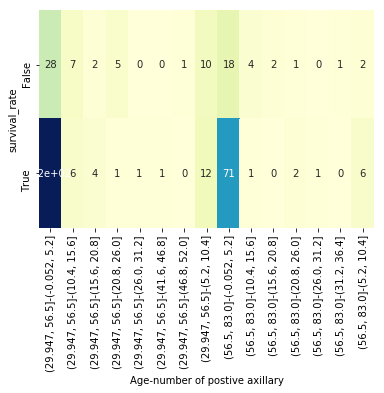

In [231]:
import seaborn as sns
sns.heatmap(ct3, cmap="YlGnBu", annot=True, cbar=False);

In [0]:
import matplotlib.pyplot as plt

In [0]:
survival_rate	= df['survival_rate']
age = df['age']
n_p_a = df['n_p_a']

In [0]:
dfct = pd.DataFrame(ct)

In [235]:
dfct.head()

n_p_a,"(-0.052, 5.2]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]","(5.2, 10.4]"
Survival,,,,,,,,,
False,46,11,4,6,0,1,0,1,12
True,190,7,4,3,2,0,1,0,18


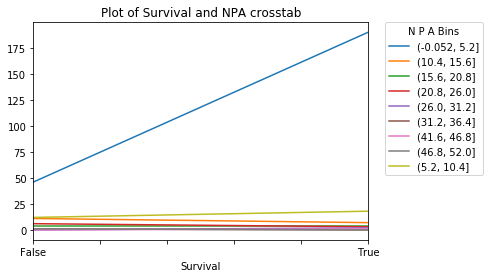

In [239]:
dfct.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'N P A Bins')
plt.title('Plot of Survival and NPA crosstab')

plt.show()

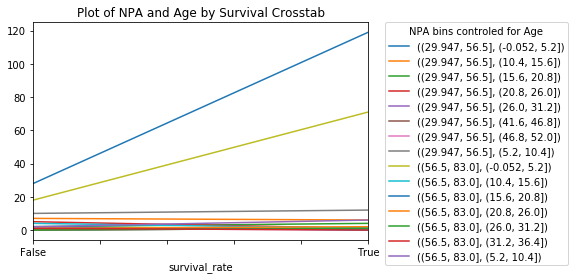

In [240]:
ct3.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'NPA bins controled for Age')
plt.title('Plot of NPA and Age by Survival Crosstab')
plt.show()

In [0]:
# Clear relationship, with the least number of positive axiliary and survivall rate, represented by the blue line

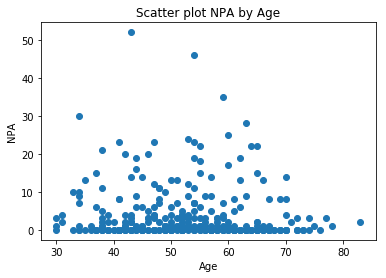

In [242]:
plt.scatter(df.age, df.n_p_a)
plt.title('Scatter plot NPA by Age')
plt.xlabel('Age')
plt.ylabel('NPA')
plt.show()

In [0]:
# Now  we will explore the relationship with the year of operation and survival rate
# Bin the years of operations and crosstab with the survival rate

year_o_bins = pd.cut(df['year_o'], 10).astype('<U32')
ct_survival_yo = pd.crosstab(df.survival_rate, year_o_bins, normalize = True, rownames = ['Survival'], colnames = ['Year of operation'])

In [246]:
ct_survival_yo

Year of operation,"(57.989, 59.1]","(59.1, 60.2]","(60.2, 61.3]","(61.3, 62.4]","(62.4, 63.5]","(63.5, 64.6]","(64.6, 65.7]","(65.7, 66.8]","(66.8, 67.9]","(67.9, 69.0]"
Survival,,,,,,,,,,
False,0.068627,0.013072,0.009804,0.022876,0.026144,0.026144,0.042484,0.019608,0.013072,0.022876
True,0.137255,0.078431,0.075163,0.052288,0.071895,0.075163,0.049020,0.071895,0.068627,0.055556


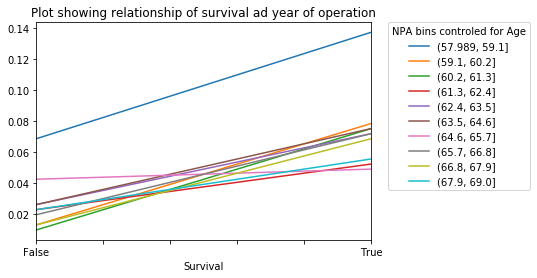

In [248]:
ct_survival_yo.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Year of operation bins')
plt.title('Plot showing relationship of survival ad year of operation')
plt.show()

In [0]:
plt.scatter(df.year_o, df.age);

In [250]:
# I will now use the group by method to better understand the relationships, a mean of survival will give me a better idea on the relationship between an age, NPA, etc. and survivalship, eahc on its own

df.groupby('survival_rate').agg({'n_p_a': ['count','mean', 'max']})

n_p_a              
              count      mean max
survival_rate                    
False            81  7.456790  52
True            225  2.791111  46

In [173]:
# Group by Age, based on survivalship, here we can see how many person were at a certain age and their mean of survivalship

df_group_age_surv = df.groupby('age').agg({'survival_encoding': ['mean']})
df_group_age_surv.head()

,survival_encoding
,mean
age,
30,1.000000
31,1.000000
33,1.000000
34,0.714286
35,1.000000


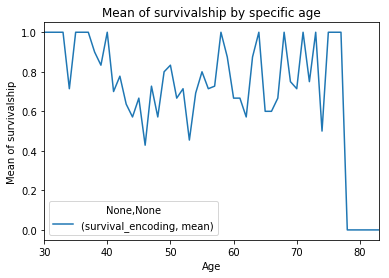

In [252]:
# Graph to see the mean of survivalship at any specific age
df_group_age_surv.plot()
plt.title('Mean of survivalship by specific age')
plt.xlabel('Age')
plt.ylabel('Mean of survivalship')
plt.show()

In [253]:
# Now we want to see if the year of operation had an effect on survival

df_group_year_surv = df.groupby('year_o').agg({'survival_encoding': ['mean']})
df_group_year_surv.head()

,survival_encoding
,mean
year_o,
58,0.666667
59,0.666667
60,0.857143
61,0.884615
62,0.695652


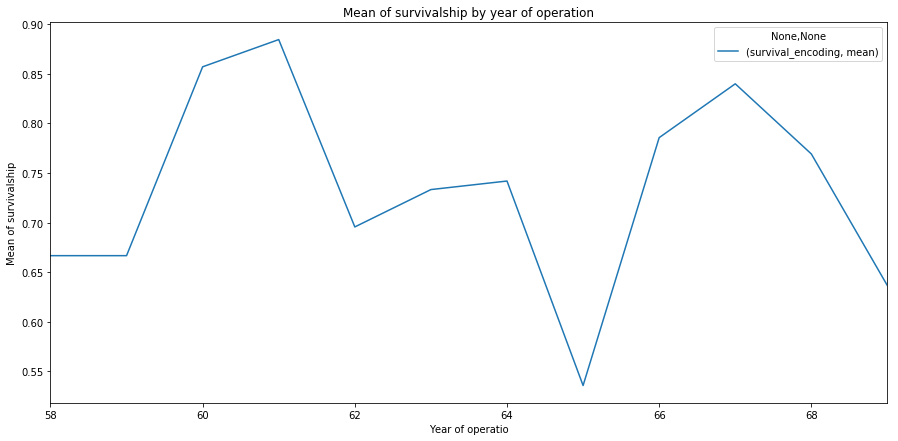

In [254]:
fig, ax = plt.subplots(figsize=(15,7))
df_group_year_surv.plot(ax=ax)
plt.title('Mean of survivalship by year of operation')
plt.xlabel('Year of operation')
plt.ylabel('Mean of survivalship')
plt.show()
plt.show()

In [255]:
df_group_npa_surv = df.groupby('survival_encoding').agg({'n_p_a': ['mean']})
df_group_npa_surv.head()

,n_p_a
,mean
survival_encoding,
0,7.456790
1,2.791111


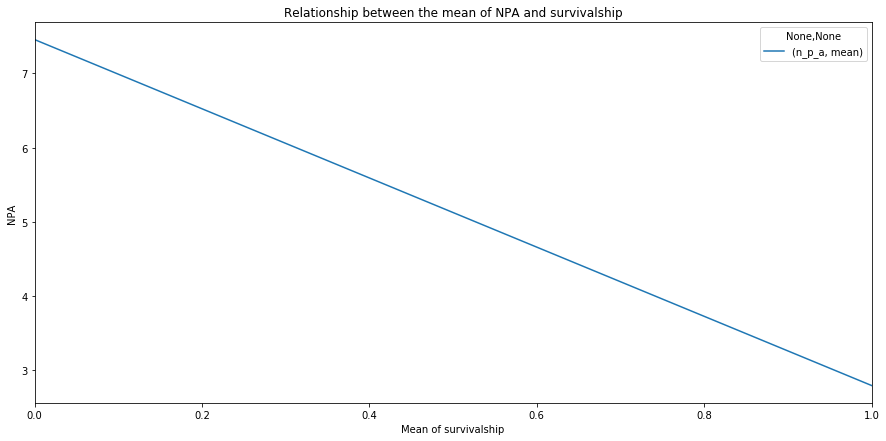

In [256]:
fig, ax = plt.subplots(figsize=(15,7))
df_group_npa_surv.plot(ax=ax)
plt.title('Relationship between the mean of NPA and survivalship')
plt.xlabel('Mean of survivalship')
plt.ylabel('NPA')
plt.show()


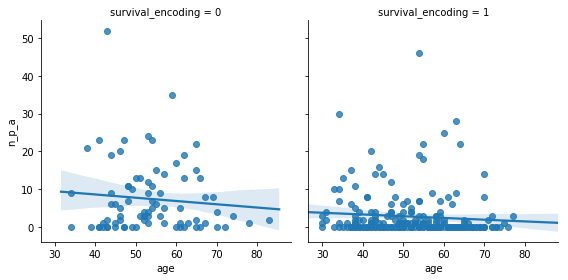

In [262]:
# see relationshp between year of operation and survival while controling for survival rate

g = sns.FacetGrid(df, col='survival_encoding', height=4)
g.map(sns.regplot, "age", "n_p_a")

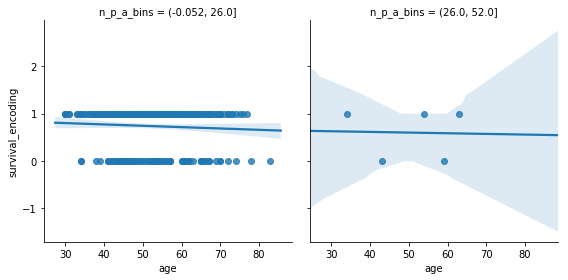

In [267]:
# control for NPA and see relationship between age and survival

df['n_p_a_bins'] = pd.cut(df.n_p_a, 2)
g = sns.FacetGrid(df, col='n_p_a_bins', height=4)
g.map(sns.regplot, "age", "survival_encoding");

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [0]:
# What is at least one feature that looks to have a positive relationship with survival?

In [0]:
# Between 1958 and 1969, it seems that the operations started to become have less effectivness with time, 

In [0]:
# What is at least one feature that looks to have a negative relationship with survival?

In [0]:
# Clear relationship, with the least number of positive axiliary and survivall rate, represented by the blue line
# But as we see from the crosstable, this relationship is true at lower number of Positive axiliary and not when those number become more important
# We also find true that this relationship on its own holds true no matter the age.

In [0]:
# We can see clearly see that the less number of postive axiliary the more are the chances of survival, and you had a higher chance of survival if you were operated on between the year 61 and 62 and the year 66 and 68. i am not sure these two are related.

In [0]:
# I feel i missing something, i looked at much more graphs than shown above, but these are the ones that i found made most sense. I could not find strong positive relationship only a stron negative one.